,group,P0,Kbed,H_ridge,E_south
0,A,1.8,0.000020,6651,4.82
1,B,1.8,0.000100,7523,5.32
2,C,1.8,0.000001,43138,2.30
3,D,1.0,0.000020,6651,5.31
4,E,3.0,0.000020,6651,4.83


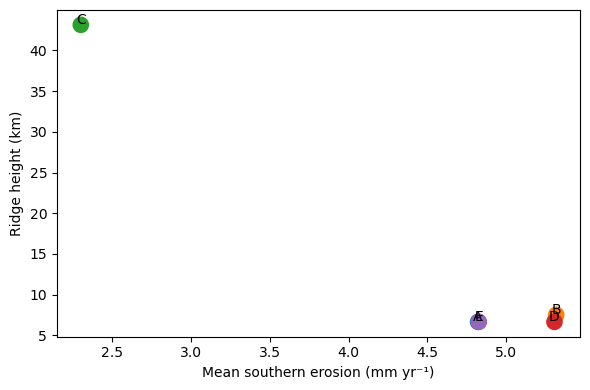

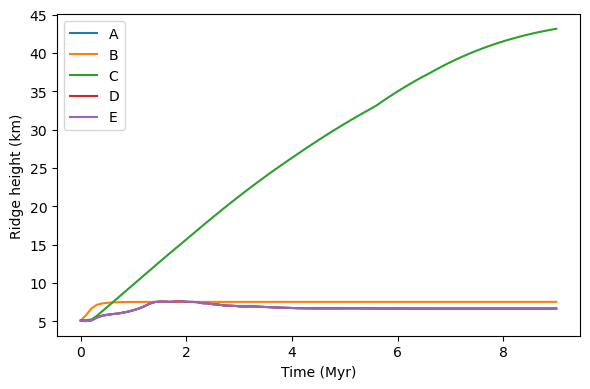

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

groups = ['A', 'B', 'C', 'D', 'E']          
P0     = [1.8, 1.8, 1.8, 1.0, 3.0]         
Kbed   = [2e-5, 1e-4, 1e-6, 2e-5, 2e-5]     

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

records, Hcurves = [], {}

for g in groups:
    elev   = xr.open_dataset(f"{g}_elevation.nc")['topography__elevation']
    rate   = xr.open_dataset(f"{g}_erosion_rate.nc")     ['erosion__rate']
    precip = xr.open_dataset(f"{g}_precip.nc")   ['climate__precip_rate']
    

    H_t          = elev.max(dim=('y', 'x'))
    Hcurves[g]   = H_t


    H_ridge = float(H_t.isel(out=-1))                 # m
    mask    = precip.isel(out=-1) > 1.0               
    E_south = float(rate.isel(out=-1).where(mask).mean())  # m yr⁻¹
    
    records.append(dict(group=g, P0=P0[groups.index(g)],
                        Kbed=Kbed[groups.index(g)],
                        H_ridge=H_ridge, E_south=E_south))



df = pd.DataFrame(records)

plt.figure(figsize=(6,4))
plt.scatter(df.E_south*1000,          # x：mm yr⁻¹
            df.H_ridge/1000,          # y：km
            s=120, c=colors)

for _, row in df.iterrows():
    plt.text(row.E_south*1000, row.H_ridge/1000 + 0.1,
             row.group, ha='center')

plt.xlabel('Mean southern erosion (mm yr⁻¹)')
plt.ylabel('Ridge height (km)')
plt.tight_layout()
plt.savefig('Fig6_HEscatter.png', dpi=300)


plt.figure(figsize=(6,4))
for g, col in zip(groups, colors):
    H_t = Hcurves[g]
    plt.plot(H_t.out/1e6, H_t/1000, label=g, color=col)

plt.xlabel('Time (Myr)')
plt.ylabel('Ridge height (km)')
plt.legend()
plt.tight_layout()
plt.savefig('Fig7_Ht.png', dpi=300)


table2 = df[['group', 'P0', 'Kbed', 'H_ridge', 'E_south']].copy()
table2['H_ridge'] = table2.H_ridge.round(0).astype(int)          # m
table2['E_south'] = (table2.E_south*1000).round(2)               # mm yr⁻¹
table2.to_csv('Table2_HE.csv', index=False)     # 供 Word/LaTeX 引用
display(table2)

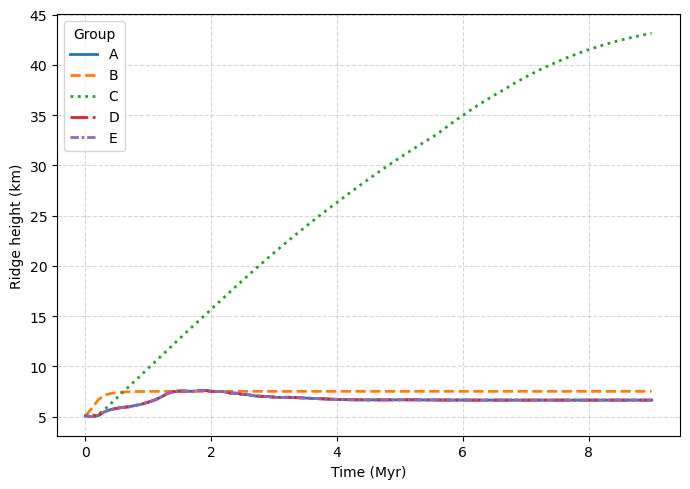

In [ ]:
import matplotlib.pyplot as plt


groups = ['A', 'B', 'C', 'D', 'E']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
linestyles = ['solid', 'dashed', 'dotted', 'dashdot', (0, (3, 1, 1, 1))]  # 五种线型


plt.figure(figsize=(7,5))   
for g, col, ls in zip(groups, colors, linestyles):
    H_t = Hcurves[g]  
    plt.plot(H_t.out/1e6, H_t/1000, label=g, color=col, linestyle=ls, linewidth=2)

plt.xlabel('Time (Myr)')
plt.ylabel('Ridge height (km)')
plt.legend(title='Group', loc='best')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('Fig7_Ht_linetype.png', dpi=300)
plt.show()